In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
data=pd.read_csv("https://gist.githubusercontent.com/DanishVasdev/d03d6deca8dbdd17c56df3f8a0df6c4b/raw/train.csv")
print(data.head(3))
print(data.shape)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  

[3 rows x 21 columns]
(2000, 21)


In [ ]:
train=data[:1500]
test=data[1500:]
print("train: ",train.shape)
print("test: ",test.shape)

train:  (1500, 21)
test:  (500, 21)


In [ ]:
def to_dataset(data):
  features=list(data.columns)[:20]
  print(features)

  data = (
      tf.data.Dataset.from_tensor_slices(
          (
              tf.cast(data[features].values, tf.float32),
              tf.cast(data['price_range'].values, tf.int32)
          )
      )
  )
  return data

In [ ]:
#train=to_dataset(train)
#test=to_dataset(test)

In [ ]:

def model_creator():
  inputs=tf.keras.Input(shape=(20,))
  dense1=tf.keras.layers.Dense(8,activation="relu")(inputs)
  dense2=tf.keras.layers.Dense(8,activation="relu")(dense1)
  output=tf.keras.layers.Dense(4,activation="softmax")(dense2)
  my_model=tf.keras.Model(inputs,output)
  return my_model


In [ ]:
model=model_creator()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=["categorical_crossentropy"],
              metrics=["accuracy",tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])

In [ ]:
y=tf.keras.utils.to_categorical(train.iloc[:,20:])
csv_log= tf.keras.callbacks.CSVLogger('training')
weight_log=tf.keras.callbacks.ModelCheckpoint(
    './drive/My Drive/Colab Notebooks/logs/weights1.{epoch:02d}.h5',
)
model.fit(train.iloc[:,:20],y,epochs=100,callbacks=[csv_log,weight_log])

Epoch 1/100
47/47 [==============================] - 3s 11ms/step - loss: 113.0128 - accuracy: 0.2320 - true_positives: 346.0000 - true_negatives: 3355.0000 - false_positives: 1145.0000 - false_negatives: 1154.0000
Epoch 2/100
47/47 [==============================] - 1s 11ms/step - loss: 6.6512 - accuracy: 0.3167 - true_positives: 459.0000 - true_negatives: 3565.0000 - false_positives: 935.0000 - false_negatives: 1041.0000
Epoch 3/100
47/47 [==============================] - 0s 10ms/step - loss: 2.9240 - accuracy: 0.3480 - true_positives: 481.0000 - true_negatives: 3648.0000 - false_positives: 852.0000 - false_negatives: 1019.0000
Epoch 4/100
47/47 [==============================] - 1s 12ms/step - loss: 2.5369 - accuracy: 0.3447 - true_positives: 436.0000 - true_negatives: 3752.0000 - false_positives: 748.0000 - false_negatives: 1064.0000
Epoch 5/100
47/47 [==============================] - 0s 10ms/step - loss: 1.7814 - accuracy: 0.4053 - true_positives: 450.0000 - true_negatives: 3911

In [ ]:
df1=pd.read_csv("training")
df1.to_csv("./drive/My Drive/Colab Notebooks/logs/training1.csv")

In [ ]:
print(df1.head(10))

   epoch  accuracy  false_negatives  false_positives        loss  \
0      0  0.232000           1154.0           1145.0  113.012794   
1      1  0.316667           1041.0            935.0    6.651169   
2      2  0.348000           1019.0            852.0    2.923978   
3      3  0.344667           1064.0            748.0    2.536863   
4      4  0.405333           1050.0            589.0    1.781389   
5      5  0.396000           1064.0            549.0    1.633683   
6      6  0.382667           1137.0            486.0    1.540272   
7      7  0.395333           1104.0            494.0    1.737747   
8      8  0.397333           1080.0            511.0    1.786196   
9      9  0.391333           1127.0            418.0    1.453287   

   true_negatives  true_positives  
0          3355.0           346.0  
1          3565.0           459.0  
2          3648.0           481.0  
3          3752.0           436.0  
4          3911.0           450.0  
5          3951.0           436.0  

In [ ]:

predictions=model.predict(test.iloc[:,:20])
model.save("./drive/My Drive/Colab Notebooks/logs/my_model.h5")

16/16 [==============================] - 0s 1ms/step


In [ ]:
for i in range(len(predictions)):
  predictions[i]=np.argmax(predictions[i])

In [ ]:
df2=pd.DataFrame(test)
df2.to_csv("./drive/My Drive/Colab Notebooks/logs/test1.csv")

In [ ]:
print(predictions[4][0])

3.0


In [ ]:
confusion_matrix=np.zeros((4,4))
for i in range(500):
  confusion_matrix[df2.price_range[1500+i]][int(predictions[i][0])]+=1
      

In [ ]:
confusion_matrix

array([[109.,  13.,   3.,   0.],
       [ 23.,  48.,  44.,  13.],
       [  1.,  11.,  40.,  74.],
       [  0.,   0.,   2., 119.]])

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 14.3 MB/s 


In [ ]:
import shap

explainer = shap.explainers.Permutation(model.predict,test.iloc[:,:20] )
shap_values = explainer(test.iloc[:100,:20])


63/63 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 2/100 [00:00<?, ?it/s]

63/63 [==============================] - 0s 871us/step


Permutation explainer:   4%|▍         | 4/100 [00:17<03:03,  1.92s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:   5%|▌         | 5/100 [00:20<03:18,  2.09s/it]

63/63 [==============================] - 0s 897us/step


Permutation explainer:   6%|▌         | 6/100 [00:22<03:20,  2.13s/it]

65/65 [==============================] - 0s 883us/step


Permutation explainer:   7%|▋         | 7/100 [00:24<03:18,  2.14s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 8/100 [00:27<03:29,  2.28s/it]

63/63 [==============================] - 0s 943us/step


Permutation explainer:   9%|▉         | 9/100 [00:29<03:27,  2.28s/it]

65/65 [==============================] - 0s 942us/step


Permutation explainer:  10%|█         | 10/100 [00:31<03:26,  2.30s/it]

63/63 [==============================] - 0s 974us/step


Permutation explainer:  11%|█         | 11/100 [00:33<03:22,  2.27s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 12/100 [00:36<03:20,  2.28s/it]

64/64 [==============================] - 0s 885us/step


Permutation explainer:  13%|█▎        | 13/100 [00:38<03:15,  2.25s/it]

64/64 [==============================] - 0s 875us/step


Permutation explainer:  14%|█▍        | 14/100 [00:40<03:15,  2.28s/it]

65/65 [==============================] - 0s 981us/step


Permutation explainer:  15%|█▌        | 15/100 [00:43<03:15,  2.30s/it]

64/64 [==============================] - 0s 922us/step


Permutation explainer:  16%|█▌        | 16/100 [00:45<03:12,  2.29s/it]

63/63 [==============================] - 0s 932us/step


Permutation explainer:  17%|█▋        | 17/100 [00:47<03:10,  2.30s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█▊        | 18/100 [00:49<03:06,  2.27s/it]

63/63 [==============================] - 0s 807us/step


Permutation explainer:  19%|█▉        | 19/100 [00:52<03:06,  2.31s/it]

63/63 [==============================] - 0s 930us/step


Permutation explainer:  20%|██        | 20/100 [00:54<03:05,  2.32s/it]

64/64 [==============================] - 0s 990us/step


Permutation explainer:  21%|██        | 21/100 [00:56<03:01,  2.30s/it]

64/64 [==============================] - 0s 892us/step


Permutation explainer:  22%|██▏       | 22/100 [00:59<03:00,  2.32s/it]

64/64 [==============================] - 0s 954us/step


Permutation explainer:  23%|██▎       | 23/100 [01:01<02:59,  2.33s/it]

62/62 [==============================] - 0s 875us/step


Permutation explainer:  24%|██▍       | 24/100 [01:03<02:53,  2.28s/it]

63/63 [==============================] - 0s 986us/step


Permutation explainer:  25%|██▌       | 25/100 [01:06<02:58,  2.38s/it]

64/64 [==============================] - 0s 955us/step


Permutation explainer:  26%|██▌       | 26/100 [01:09<03:14,  2.62s/it]

65/65 [==============================] - 0s 941us/step


Permutation explainer:  27%|██▋       | 27/100 [01:11<03:04,  2.52s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  28%|██▊       | 28/100 [01:14<02:56,  2.45s/it]

64/64 [==============================] - 0s 876us/step


Permutation explainer:  29%|██▉       | 29/100 [01:16<02:50,  2.40s/it]

63/63 [==============================] - 0s 940us/step


Permutation explainer:  30%|███       | 30/100 [01:18<02:45,  2.37s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  31%|███       | 31/100 [01:20<02:41,  2.33s/it]

64/64 [==============================] - 0s 946us/step


Permutation explainer:  32%|███▏      | 32/100 [01:23<02:37,  2.31s/it]

63/63 [==============================] - 0s 844us/step


Permutation explainer:  33%|███▎      | 33/100 [01:25<02:32,  2.28s/it]

64/64 [==============================] - 0s 771us/step


Permutation explainer:  34%|███▍      | 34/100 [01:27<02:31,  2.30s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  35%|███▌      | 35/100 [01:30<02:30,  2.32s/it]

63/63 [==============================] - 0s 950us/step


Permutation explainer:  36%|███▌      | 36/100 [01:32<02:27,  2.31s/it]

62/62 [==============================] - 0s 962us/step


Permutation explainer:  37%|███▋      | 37/100 [01:34<02:24,  2.30s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 38/100 [01:37<02:22,  2.30s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  39%|███▉      | 39/100 [01:39<02:20,  2.30s/it]

62/62 [==============================] - 0s 949us/step


Permutation explainer:  40%|████      | 40/100 [01:41<02:19,  2.32s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  41%|████      | 41/100 [01:43<02:16,  2.31s/it]

62/62 [==============================] - 0s 927us/step


Permutation explainer:  42%|████▏     | 42/100 [01:46<02:13,  2.31s/it]

63/63 [==============================] - 0s 902us/step


Permutation explainer:  43%|████▎     | 43/100 [01:48<02:12,  2.33s/it]

64/64 [==============================] - 0s 850us/step


Permutation explainer:  44%|████▍     | 44/100 [01:51<02:11,  2.34s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  45%|████▌     | 45/100 [01:53<02:08,  2.34s/it]

65/65 [==============================] - 0s 902us/step


Permutation explainer:  46%|████▌     | 46/100 [01:55<02:06,  2.34s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  47%|████▋     | 47/100 [01:58<02:03,  2.32s/it]

65/65 [==============================] - 0s 977us/step


Permutation explainer:  48%|████▊     | 48/100 [02:00<02:01,  2.33s/it]

62/62 [==============================] - 0s 952us/step


Permutation explainer:  49%|████▉     | 49/100 [02:02<01:58,  2.33s/it]

62/62 [==============================] - 0s 997us/step


Permutation explainer:  50%|█████     | 50/100 [02:04<01:55,  2.30s/it]

62/62 [==============================] - 0s 925us/step


Permutation explainer:  51%|█████     | 51/100 [02:07<01:53,  2.32s/it]

63/63 [==============================] - 0s 929us/step


Permutation explainer:  52%|█████▏    | 52/100 [02:09<01:52,  2.34s/it]

63/63 [==============================] - 0s 912us/step


Permutation explainer:  53%|█████▎    | 53/100 [02:11<01:48,  2.30s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  54%|█████▍    | 54/100 [02:14<01:45,  2.29s/it]

63/63 [==============================] - 0s 910us/step


Permutation explainer:  55%|█████▌    | 55/100 [02:16<01:43,  2.30s/it]

65/65 [==============================] - 0s 967us/step


Permutation explainer:  56%|█████▌    | 56/100 [02:18<01:41,  2.31s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  57%|█████▋    | 57/100 [02:21<01:39,  2.31s/it]

64/64 [==============================] - 0s 991us/step


Permutation explainer:  58%|█████▊    | 58/100 [02:23<01:37,  2.31s/it]

63/63 [==============================] - 0s 932us/step


Permutation explainer:  59%|█████▉    | 59/100 [02:25<01:35,  2.32s/it]

64/64 [==============================] - 0s 984us/step


Permutation explainer:  60%|██████    | 60/100 [02:28<01:33,  2.33s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  61%|██████    | 61/100 [02:30<01:29,  2.31s/it]

64/64 [==============================] - 0s 789us/step


Permutation explainer:  62%|██████▏   | 62/100 [02:32<01:26,  2.28s/it]

64/64 [==============================] - 0s 961us/step


Permutation explainer:  63%|██████▎   | 63/100 [02:34<01:24,  2.29s/it]

63/63 [==============================] - 0s 919us/step


Permutation explainer:  64%|██████▍   | 64/100 [02:37<01:22,  2.29s/it]

63/63 [==============================] - 0s 988us/step


Permutation explainer:  65%|██████▌   | 65/100 [02:39<01:20,  2.31s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  66%|██████▌   | 66/100 [02:41<01:19,  2.33s/it]

65/65 [==============================] - 0s 978us/step


Permutation explainer:  67%|██████▋   | 67/100 [02:44<01:17,  2.34s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  68%|██████▊   | 68/100 [02:46<01:13,  2.31s/it]

63/63 [==============================] - 0s 965us/step


Permutation explainer:  69%|██████▉   | 69/100 [02:48<01:11,  2.32s/it]

64/64 [==============================] - 0s 956us/step


Permutation explainer:  70%|███████   | 70/100 [02:51<01:09,  2.31s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  71%|███████   | 71/100 [02:53<01:06,  2.31s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  72%|███████▏  | 72/100 [02:55<01:04,  2.30s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  73%|███████▎  | 73/100 [02:58<01:02,  2.30s/it]

64/64 [==============================] - 0s 977us/step


Permutation explainer:  74%|███████▍  | 74/100 [03:00<01:00,  2.32s/it]

62/62 [==============================] - 0s 989us/step


Permutation explainer:  75%|███████▌  | 75/100 [03:02<00:57,  2.29s/it]

64/64 [==============================] - 0s 853us/step


Permutation explainer:  76%|███████▌  | 76/100 [03:05<00:55,  2.33s/it]

64/64 [==============================] - 0s 999us/step


Permutation explainer:  77%|███████▋  | 77/100 [03:07<00:53,  2.32s/it]

63/63 [==============================] - 0s 957us/step


Permutation explainer:  78%|███████▊  | 78/100 [03:09<00:50,  2.31s/it]

63/63 [==============================] - 0s 936us/step


Permutation explainer:  79%|███████▉  | 79/100 [03:12<00:48,  2.33s/it]

62/62 [==============================] - 0s 947us/step


Permutation explainer:  80%|████████  | 80/100 [03:14<00:46,  2.30s/it]

65/65 [==============================] - 0s 938us/step


Permutation explainer:  81%|████████  | 81/100 [03:16<00:43,  2.31s/it]

64/64 [==============================] - 0s 987us/step


Permutation explainer:  82%|████████▏ | 82/100 [03:18<00:41,  2.31s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  83%|████████▎ | 83/100 [03:21<00:39,  2.30s/it]

63/63 [==============================] - 0s 905us/step


Permutation explainer:  84%|████████▍ | 84/100 [03:23<00:36,  2.30s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  85%|████████▌ | 85/100 [03:25<00:34,  2.32s/it]

65/65 [==============================] - 0s 932us/step


Permutation explainer:  86%|████████▌ | 86/100 [03:28<00:32,  2.34s/it]

64/64 [==============================] - 0s 825us/step


Permutation explainer:  87%|████████▋ | 87/100 [03:30<00:30,  2.31s/it]

63/63 [==============================] - 0s 954us/step


Permutation explainer:  88%|████████▊ | 88/100 [03:32<00:27,  2.33s/it]

61/61 [==============================] - 0s 1ms/step


Permutation explainer:  89%|████████▉ | 89/100 [03:35<00:25,  2.31s/it]

64/64 [==============================] - 0s 990us/step


Permutation explainer:  90%|█████████ | 90/100 [03:37<00:22,  2.29s/it]

61/61 [==============================] - 0s 974us/step


Permutation explainer:  91%|█████████ | 91/100 [03:39<00:20,  2.27s/it]

63/63 [==============================] - 0s 929us/step


Permutation explainer:  92%|█████████▏| 92/100 [03:41<00:17,  2.24s/it]

63/63 [==============================] - 0s 967us/step


Permutation explainer:  93%|█████████▎| 93/100 [03:44<00:15,  2.27s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  94%|█████████▍| 94/100 [03:46<00:13,  2.30s/it]

63/63 [==============================] - 0s 989us/step


Permutation explainer:  95%|█████████▌| 95/100 [03:48<00:11,  2.30s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  96%|█████████▌| 96/100 [03:51<00:09,  2.34s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  97%|█████████▋| 97/100 [03:53<00:07,  2.34s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  98%|█████████▊| 98/100 [03:55<00:04,  2.35s/it]

62/62 [==============================] - 0s 966us/step


Permutation explainer:  99%|█████████▉| 99/100 [03:58<00:02,  2.35s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer: 100%|██████████| 100/100 [04:00<00:00,  2.33s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer: 101it [04:02,  2.45s/it]


In [ ]:
shap_values = shap_values[...,1]
shap_values

.values =
array([[-0.00387497, -0.00528622, -0.01924978, ...,  0.00516105,
        -0.01044411, -0.01142649],
       [-0.0219502 ,  0.00586179, -0.01851087, ...,  0.00500342,
         0.0144194 ,  0.00731697],
       [ 0.0037336 ,  0.00440648, -0.01697286, ...,  0.00510759,
        -0.0083223 , -0.00704234],
       ...,
       [-0.01137449, -0.00074559, -0.01239318, ..., -0.00079919,
        -0.00382482, -0.00278841],
       [-0.00754156, -0.00055242,  0.00581678, ...,  0.00133062,
        -0.00320169, -0.00137877],
       [ 0.00029138,  0.00057981, -0.00254107, ...,  0.00099334,
        -0.00131346,  0.00099422]])

.base_values =
array([0.20380672, 0.20380672, 0.20380672, 0.20380672, 0.20380672,
       0.20380672, 0.20380672, 0.20380672, 0.20380672, 0.20380672,
       0.20380672, 0.20380672, 0.20380672, 0.20380672, 0.20380672,
       0.20380672, 0.20380672, 0.20380672, 0.20380672, 0.20380672,
       0.20380672, 0.20380672, 0.20380672, 0.20380672, 0.20380672,
       0.20380672, 0.20380

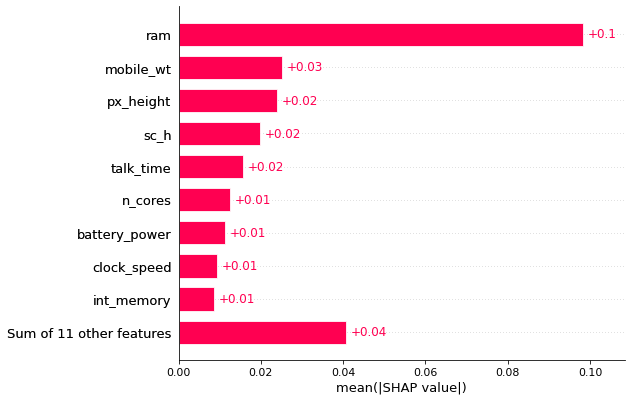

In [ ]:
shap.plots.bar(shap_values)

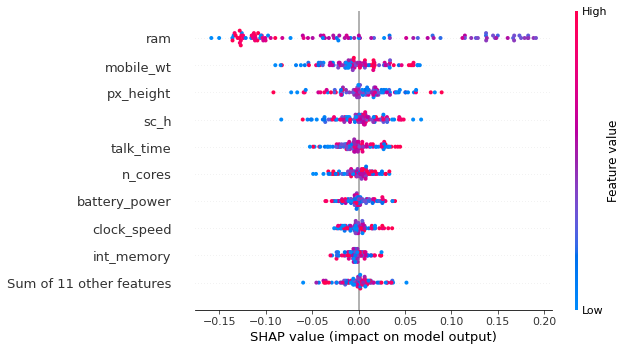

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
df3=pd.DataFrame(shap_values.values)
df3
df3.T.to_csv("./drive/My Drive/Colab Notebooks/logs/shap.csv")

In [ ]:

df3.to_csv("./drive/My Drive/Colab Notebooks/logs/shap2.csv")

In [ ]:
model=tf.keras.models.load_model('./drive/My Drive/Colab Notebooks/logs/my_model.h5')

In [ ]:
weights=model.get_weights()
weights=np.asarray(weights)
weight_list=[weights]
print(weights)

[array([[-3.22602764e-02, -5.63557804e-01,  1.42207742e-03,
         -2.30906457e-01, -1.86639484e-02, -2.16304772e-02,
         -2.77634203e-01,  2.18759671e-01],
        [-1.40595406e-01, -1.74094573e-01,  3.26317251e-01,
          7.25025237e-02, -1.10350692e+00,  3.93451262e+00,
         -5.05261868e-02, -1.05094686e-01],
        [-4.31774735e-01, -1.67147696e-01,  2.07591712e-01,
         -2.63927549e-01, -6.92959189e-01,  7.56789160e+00,
         -2.66770750e-01,  4.78079468e-02],
        [ 6.90404847e-02, -3.74795198e-01, -8.64442289e-02,
          2.67177518e-03, -1.27035153e+00,  7.59062481e+00,
          2.62696207e-01, -3.50663662e-01],
        [-7.34308586e-02, -4.86831188e-01, -2.68751919e-01,
          7.16558695e-02, -6.49386346e-01, -5.89060457e-03,
          2.21486434e-01, -3.98104608e-01],
        [-1.43148512e-01, -2.09540769e-01, -3.73320043e-01,
          5.65284491e-03, -6.27406895e-01,  5.77238655e+00,
          8.28171611e-01,  1.32989392e-01],
        [-1.5314

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
print(weights.shape)

(6,)


In [ ]:
df4=pd.DataFrame(weights)
df4.to_csv('./drive/My Drive/Colab Notebooks/logs/weights.csv')

In [ ]:
weight_list=[]
for i in range(1,101,10):
  model=tf.keras.models.load_model('./drive/My Drive/Colab Notebooks/logs/weights1.%02d.h5'%(i))
  weight_list.append(np.asarray(model.get_weights()))
print(len(weight_list))
print(weight_list[0].shape)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10
(6,)


In [ ]:
df4=pd.DataFrame(weight_list)
print(df4.head(5))
df4.to_csv('./drive/My Drive/Colab Notebooks/logs/weights1.csv')

                                                   0  \
0  [[0.43523753, -0.554063, 0.0014220774, -0.2301...   
1  [[0.26846433, -0.5635578, 0.0014220774, -0.230...   
2  [[0.17672597, -0.5635578, 0.0014220774, -0.230...   
3  [[0.12980343, -0.5635578, 0.0014220774, -0.230...   
4  [[0.07635091, -0.5635578, 0.0014220774, -0.230...   

                                                   1  \
0  [0.051542185, -0.1382689, 0.0, -0.051534686, -...   
1  [-0.0054819304, -0.14829613, 0.0, -0.052276175...   
2  [0.02316496, -0.14829613, 0.0, -0.052276175, -...   
3  [0.094285086, -0.14829613, 0.0, -0.052276175, ...   
4  [0.1567428, -0.14829613, 0.0, -0.052276175, -0...   

                                                   2  \
0  [[0.15048257, 0.45359024, 0.22082183, -0.16195...   
1  [[0.16052379, 0.4304444, 0.22546187, -0.154472...   
2  [[0.16918597, 0.4240336, 0.22035787, -0.194757...   
3  [[0.18004553, 0.42363635, 0.21962444, -0.20338...   
4  [[0.19170849, 0.42205268, 0.21728519, -0.21

In [ ]:
df4.iloc[0,0]

array([[ 0.43523753, -0.554063  ,  0.00142208, -0.23016486, -0.00317814,
        -0.20490417, -0.34695122,  0.22015108],
       [-0.36818555, -0.16917185,  0.32631725,  0.073244  , -0.28924215,
        -0.3142181 , -0.25484905, -0.10370341],
       [-0.40791458, -0.15902175,  0.20759171, -0.2631863 , -0.19132099,
        -0.19012831, -0.07130148,  0.04919918],
       [-0.22490449, -0.36984053, -0.08644423,  0.00341329, -0.5124707 ,
        -0.03021243,  0.03765203, -0.34927255],
       [ 0.10900211, -0.47787642, -0.26875192,  0.07239749, -0.4827723 ,
         0.34886357, -0.14708377, -0.39671332],
       [-0.07680374, -0.20091416, -0.37332004,  0.00565284,  0.11615726,
         0.39172903,  0.12960277,  0.13438062],
       [-0.22759385, -0.13744508,  0.06547397,  0.15016487,  0.14879388,
        -0.24441858, -0.10905766,  0.33715606],
       [-0.0689382 , -0.4375887 ,  0.00511637,  0.17802133, -0.24860477,
        -0.41467676, -0.37750396,  0.17876928],
       [ 0.42782873, -0.22136289

In [ ]:
df5=pd.DataFrame(columns=["node","epoch","layer","weight","bias","target"])

In [ ]:
df4.iloc[0,5]

array([-0.09186735,  0.07981972,  0.09808782,  0.07735376], dtype=float32)

In [ ]:
l=0
t=0
for epoch in range(0,10):
    j=0
    for i in df4.iloc[epoch,0]:
        for k in i:
            df5.loc[l,["node","epoch","layer","weight","bias","target"]]=[j,epoch,0,k,0,t]
            t+=1
            l+=1
        j+=1
        t=0
for epoch in range(0,10):
    j=0
    for i in df4.iloc[epoch,1]:
          df5.loc[l,["node","epoch","layer","weight","bias","target"]]=[j,epoch,1,0,i,0]
          l+=1
          j+=1
for epoch in range(0,10):
    j=0
    for i in df4.iloc[epoch,2]:
        for k in i:
            df5.loc[l,["node","epoch","layer","weight","bias","target"]]=[j,epoch,1,k,0,t]
            l+=1
            t+=1
        j+=1
        t=0
for epoch in range(0,10):
    j=0
    for i in df4.iloc[epoch,3]:
          df5.loc[l,["node","epoch","layer","weight","bias","target"]]=[j,epoch,2,0,i,0]
          l+=1
          j+=1
for epoch in range(0,10):
    j=0
    for i in df4.iloc[epoch,4]:
        for k in i:
            df5.loc[l,["node","epoch","layer","weight","bias","target"]]=[j,epoch,2,k,0,t]
            l+=1
            t+=1
        j+=1
        t=0

for epoch in range(0,10):
    j=0
    for i in df4.iloc[epoch,5]:
          df5.loc[l,["node","epoch","layer","weight","bias","target"]]=[j,epoch,3,0,i,0]
          l+=1
          j+=1


In [ ]:
df5

,node,epoch,layer,weight,bias,target
0,0,0,0,0.435238,0,0
1,0,0,0,-0.554063,0,1
2,0,0,0,0.001422,0,2
3,0,0,0,-0.230165,0,3
4,0,0,0,-0.003178,0,4
...,...,...,...,...,...,...
2755,3,8,3,0,1.818052,0
2756,0,9,3,0,-3.186536,0
2757,1,9,3,0,-0.120565,0
2758,2,9,3,0,1.414454,0


In [ ]:
df5.to_csv('./drive/My Drive/Colab Notebooks/logs/weights_2.csv')

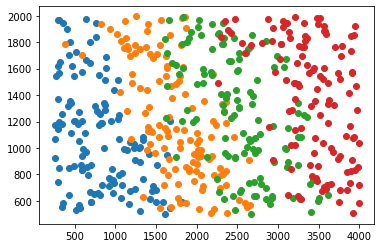

In [ ]:
import matplotlib.pyplot as plt
x='ram'
y='battery_power'

plt.scatter(test[test['price_range']==0][x],test[test['price_range']==0][y])
plt.scatter(test[test['price_range']==1][x],test[test['price_range']==1][y])
plt.scatter(test[test['price_range']==2][x],test[test['price_range']==2][y])
plt.scatter(test[test['price_range']==3][x],test[test['price_range']==3][y])
plt.show()

In [ ]:
predictions=model.predict(test.iloc[:,:20])
predictions=pd.DataFrame(predictions)
print(test[0])
t=pd.concat([test,predictions],axis=1)
#print(t)

16/16 [==============================] - 0s 2ms/step


KeyError: ignored

In [ ]:
df6=pd.DataFrame(columns=[['epoch']+list(test.columns)+['prob0','prob1','prob2','prob3']])

In [ ]:
k=0
for i in range(1,101,10):
  model=tf.keras.models.load_model('./drive/My Drive/Colab Notebooks/logs/weights1.%02d.h5'%(i))
  predictions=model.predict(test.iloc[:,:20])
  for j in range(len(test)):
    df6.loc[k,['epoch']+list(test.columns)+['prob0','prob1','prob2','prob3']]=[i-1]+list(test.iloc[j,:])+list(predictions[j])
    k+=1

df6
      
  


16/16 [==============================] - 0s 1ms/step


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,prob0,prob1,prob2,prob3,epoch
0,1225.0,0.0,0.7,1.0,6.0,0.0,60.0,0.1,107.0,2.0,...,6.0,1.0,0.0,0.0,2.0,2.737077e-20,1.812093e-22,9.999999e-01,2.175714e-19,0.0
1,1970.0,1.0,0.5,1.0,0.0,1.0,15.0,1.0,132.0,2.0,...,20.0,1.0,1.0,1.0,2.0,4.689452e-02,2.344230e-01,3.466228e-30,7.186825e-01,0.0
2,1186.0,1.0,0.5,1.0,2.0,0.0,21.0,0.4,160.0,8.0,...,7.0,1.0,0.0,0.0,1.0,4.986202e-02,3.385183e-14,5.230521e-02,8.978327e-01,0.0
3,1762.0,0.0,0.7,0.0,7.0,0.0,60.0,0.1,157.0,4.0,...,14.0,1.0,0.0,0.0,1.0,2.602081e-02,1.375622e-02,1.476764e-37,9.602230e-01,0.0
4,1731.0,1.0,1.4,1.0,4.0,1.0,4.0,0.5,163.0,6.0,...,4.0,1.0,1.0,1.0,3.0,1.150377e-09,9.673149e-18,9.999997e-01,2.284295e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,19.0,1.0,1.0,0.0,0.0,3.736205e-01,6.242908e-01,2.088785e-03,2.315632e-11,90.0
4996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,16.0,1.0,1.0,1.0,2.0,6.880251e-02,7.939406e-01,1.372205e-01,3.632606e-05,90.0
4997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,5.0,1.0,1.0,0.0,3.0,3.448213e-03,8.133771e-02,3.475263e-01,5.676878e-01,90.0
4998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,19.0,1.0,1.0,1.0,0.0,7.428178e-01,2.571476e-01,3.460464e-05,1.041023e-16,90.0


In [ ]:
df6.to_csv('./drive/My Drive/Colab Notebooks/logs/pred.csv')